In [50]:
import os
import ast
import glob
import numpy as np
import pandas as pd
import pysgpp as pysgpp
import seaborn as sns

import itertools
from sklearn.model_selection import train_test_split

from pysgpp.extensions.datadriven.learner import Types
from pysgpp.extensions.datadriven.learner import LearnerBuilder
from pysgpp.extensions.datadriven.uq.plot.plot1d import plotSG1d
from pysgpp.extensions.datadriven.uq.plot.plot2d import plotSG2d,plotGrid2d
from pysgpp.extensions.datadriven.uq.plot.plot3d import plotSG3d
from pysgpp.extensions.datadriven.uq.plot.plotGrid import plotGrid
from pysgpp.extensions.datadriven.learner.folding import RandomFoldingPolicy

import matplotlib.pyplot as plt
from sklearn import preprocessing

plt.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [10]:
results = pd.read_csv('../data/error_bars.csv')

In [11]:
results.head(15)

,Unnamed: 0,accuracy,level,L2Norm,RMSerror,grid_points,adaptive,train_data
0,0,0.024227,1,0.696085,0.041577,1,Level: 1 adaptive: 0,100
1,0,0.024227,1,0.696085,0.041577,1,Level: 1 adaptive: 1,100
2,0,0.007922,2,0.398036,0.011632,19,Level: 2 adaptive: 0,100
3,0,0.007922,2,0.398036,0.011632,19,Level: 2 adaptive: 1,100
4,0,0.059112,3,1.087307,0.087691,199,Level: 3 adaptive: 0,100
5,0,0.059112,3,1.087307,0.087691,199,Level: 3 adaptive: 1,100
6,0,0.017549,4,0.592439,0.027558,1519,Level: 4 adaptive: 0,100
7,0,0.017549,4,0.592439,0.027558,1519,Level: 4 adaptive: 1,100
8,0,0.014886,1,0.771642,0.022857,1,Level: 1 adaptive: 0,200
9,0,0.014886,1,0.771642,0.022857,1,Level: 1 adaptive: 1,200


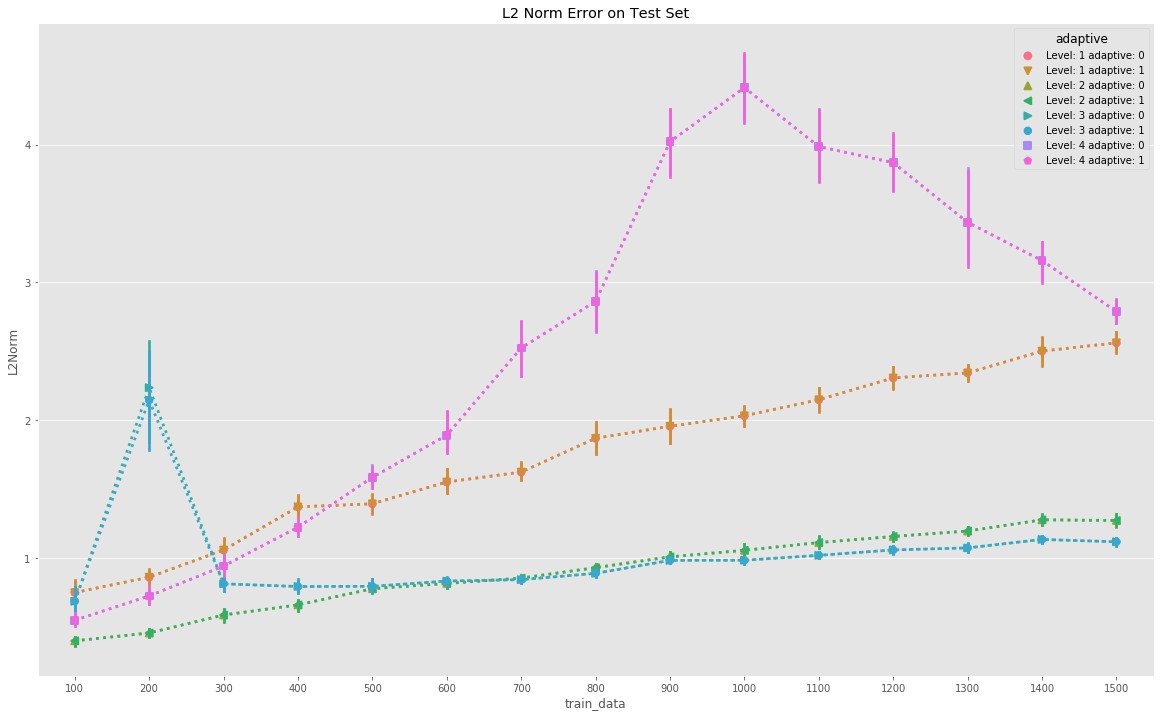

In [73]:
sns.pointplot('train_data', 'L2Norm', data=results, hue='adaptive', markers=Line2D.filled_markers, 
              linestyles=':', fit_reg=False, size=10, aspect=1 ,palette="husl", kwargs={'alpha':0.2})
plt.title('L2 Norm Error on Test Set');

In [67]:
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]
line_styles = itertools.cycle([':', '--']) 

line_syles = [line_styles.next() for _ in range(10)]

In [68]:
line_syles

[':', '--', ':', '--', ':', '--', ':', '--', ':', '--']